# Άσκηση: μελέτη επίδρασης προεπεξεργασίας στη διαστατικότητα και την ομαδοποίηση



Αρχικά κάνουμε update και import τις βιβλιοθήκες που θα χρειαστούμε.

In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade nltk

In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

Φέρνουμε το σύνολο κειμένων μας (Reuters).

In [3]:
import nltk


nltk.download('reuters') # κατεβάζουμε το dataset
from nltk.corpus import reuters # το κάνουμε import

# List of document ids
documents = reuters.fileids()
 
train_docs_id = list(filter(lambda doc: doc.startswith("train"),
                            documents))

train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


Τα δεδομένα μας θα είναι τα πρώτα 500 έγγραφα του train set

In [4]:
data = train_docs[:500]

Θα χρησιμοποιήσουμε το [TF-IDF Vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) του scikit-learn προκειμένου να μετατρέψουμε τα κείμενά μας σε έναν πίνακα διανυσμάτων. Καλείστε να πειραματιστείτε και να επιλέξετε εσείς τα ορίσματα του TF-IDF. Στη συνέχεια θα χρησιμοποιήσουμε τον αλγόριθμο k-means και τη μετρική silhouette για να εντοπίσουμε τον αριθμό των ομάδων στις οποίες ανήκουν τα κείμενα. Για να μπορέσουμε να δούμε και ορισμένα στοιχεία για τις θεματικές ενότητες στις οποίες ανήκουν τα κείμενα, θα τυπώσουμε τους πιο σημαντικούς όρους της κάθε ομάδας.

1. Δοκιμάστε να τρέξετε τον TF-IDF Vectorizer χωρίς παραμέτρους. Τι διαστάσεις έχει το διάνυσμα TF-IDF; Τα αποτελέσματα βγάζουν νόημα;
2. Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας τα english stopwords (παράμετρος stop_words='english'). Τι διαστάσεις έχει τώρα το διάνυσμα; Βελτιώθηκε καθόλου η ποιότητα του clustering;
3. Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας και τους όρους που εμφανίζονται σε λιγότερα από 10 documents (παράμετρος min_df=10). Τι διαστάσεις έχει το διάνυσμα; Βελτιώθηκε το clustering;
4. Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας και τους όρους που εμφανίζονται σε περισσότερα από το 50% των κειμένων (παράμετρος max_df=0.5). Βελτιώνει αυτό το clustering;
5. Δοκιμάστε να βελτιώσετε περαιτέρω την ποιότητα του clustering. Αυξήστε το μέγιστο k σε 50. Σε πόσες κατηγορίες χωρίζεται το σύνολο των κειμένων μας; Ποια είναι η θεματική ενότητα της κάθε κατηγορίας; Πως θα μπορούσαν να βελτιωθούν περισσότερο τα αποτελέσματα (πχ τί λείπει από τον TfidfVectorizer);

## 1. 
διαστάσεις (500, 6998)

TF-IDF array shape: (500, 6998)
Maximum average silhouette score for k = 2
Cluster 0: the to of in said and pct for it dlrs
Cluster 1: vs cts loss mln net 000 shr revs profit qtr


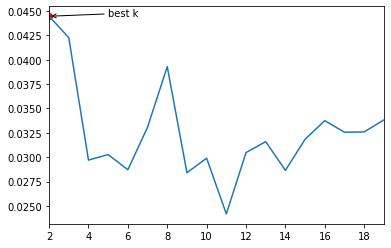

In [6]:
vectorizer = TfidfVectorizer()

tf_idf_array = vectorizer.fit_transform(data).toarray()
print('TF-IDF array shape:', tf_idf_array.shape)

silhouette_scores = []
for k in range(2, 20):
    km = KMeans(k)
    preds = km.fit_predict(tf_idf_array)
    silhouette_scores.append(silhouette_score(tf_idf_array, preds))
    
plt.plot(range(2, 20), silhouette_scores)
best_k = np.argmax(silhouette_scores) + 2 # +2 γιατί ξεκινάμε το range() από k=2 και όχι από 0 που ξεκινάει η αρίθμηση της λίστας
plt.scatter(best_k, silhouette_scores[best_k-2], color='r') # για τον ίδιο λόγο το καλύτερο k είναι αυτό 2 θέσεις παρακάτω από το index της λίστας
plt.xlim([2,19])
plt.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), xytext=(5, silhouette_scores[best_k-2]),arrowprops=dict(arrowstyle="->")) # annotation
print('Maximum average silhouette score for k =', best_k)

km = KMeans(best_k)
km.fit(tf_idf_array)
terms = vectorizer.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(best_k):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :10]:
        out += ' %s' % terms[ind]
    print(out)

## 2-5. 